## **ARIMA**: Time-Series Forecasting

En este laboratorio, nuestro objetivo será crear un modelo tipo ARIMA para crear predicciones en base a un dataset de ventas de Shampoo, que se puede está adjunto a este laboratorio. Este archivo es un .csv, por lo que deberán guardarlo en su directorio como tal.

*Si quisieran aprender más a fondo por su cuenta, les recomiendo esta [página](https://nixtlaverse.nixtla.io/statsforecast/docs/models/arima.html)*

**Qué significa ARIMA?**


---

ARIMA es el diminutivo de "AutoRegressive Integrated Moving Average". También es posible descomponer ARIMA en 3 etapas: AR, I y MA.


1.   **AR** (AutoRegressive): Este hace énfasis a un modelo de regresión que utiliza la correlación entre la observación actual y sus observaciones pasadas. (Algo asi como retroalimentación)
2.   **I** (Integration): Para realizar predicciones, es necesario tener una serie de tiempo estacionaria (es decir, que no presenta tendencia ni estacionalidad), por lo que se procede a integrar una diferenciación. Esto, típicamente, se refiere a sustraer una observación de su predecesora.
3.   **MA** (Moving Average): Este modelo utiliza la dependencia entre una observación y un error residual de un modelo de media móvil aplicado a observaciones anteriores.

*En palabras más simples, MA hace referencia a la media aritmética de **n** datos anteriores. Para más información, les dejo el wikipedia [aquí](https://es.wikipedia.org/wiki/Media_móvil)*

Cada parte de un modelo ARIMA se define con una constante que debe ser definida al momento de iniciar el modelo:



1.   **p** *(AR)* : Número de observaciones pasadas (Lag Order) a tomar en consideración en el modelo (Predictores)
2.   **d** *(I)* : Grado de Diferenciación (Número de diferenciaciones necesarias para tener una serie de tiempo estacionaria)
3.   **q** *(MA)* : Número de observaciones pasadas a tener en consideración para la media móvil

*Nota: Es importante añadir, que es posible poner valor 0 a cualquiera de estas constantes, lo que nos permite crear modelos ARMA, I, AR o MA a nuestro antojo*

1. Cargar el dataset y visualizar las primeras 5 entradas. Usar librería matplotlib para graficar la data.

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


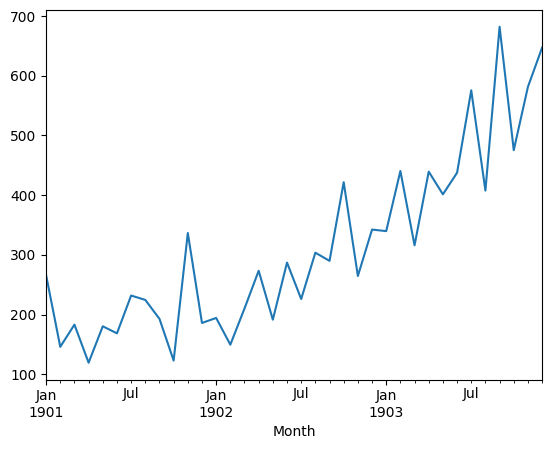

In [2]:
from pandas import read_csv
import datetime as dt
from matplotlib import pyplot

series = read_csv('shampoo.csv', parse_dates=['Month'], index_col='Month')
series = series.squeeze("columns")
print(series.head())
series.plot()
pyplot.show()

2. Usar autocorrelación para identificar constante "p" para la serie de tiempo.

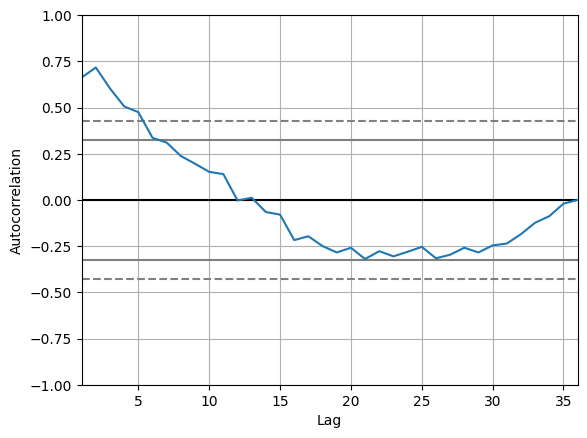

In [3]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
pyplot.show()

3. Inicializar modelo ARIMA con parámetros p, d y q, en base a punto anterior.

In [4]:
import pandas as pd
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

if not isinstance(series.index, pd.PeriodIndex):
    series.index = series.index.to_period('M')

model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Sat, 21 Sep 2024   AIC                            408.969
Time:                        20:08:34   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

4. Graficar errores residuales del modelo ARIMA. Mostrar gráfico de densidad de los errores residuales.

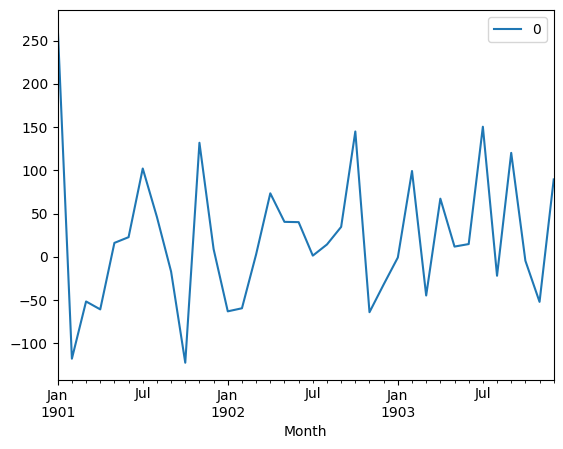

In [5]:
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

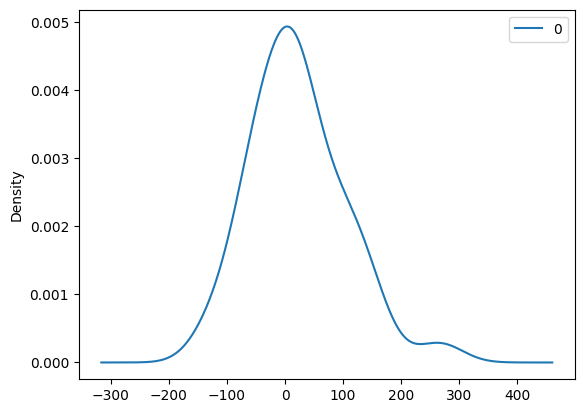

In [ ]:
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
print(residuals.describe())

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


**TAREA**

---

Encontrar una manera de obtener los mejores parámetros para el modelo ARIMA en base a los datos utilizados.

5. Dividir el dataset en entrenamiento y validación y reentrenar modelo ARIMA

predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


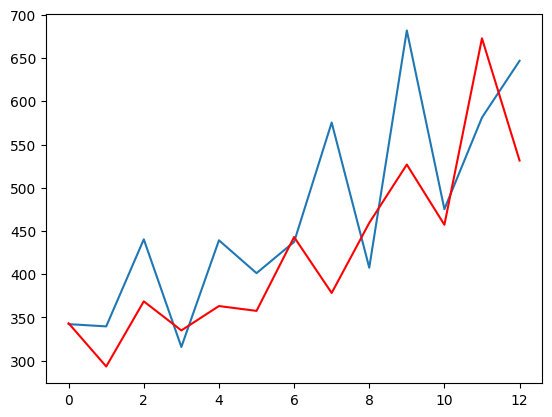

In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt

X = series.values
size = int(len(X) * 0.65)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation

for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

**PROPHET**

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet
from prophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
file = 'shampoo.csv'
df = pd.read_csv(file)
df.head()

,Month,Sales
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


In [ ]:
df['Month'] = pd.DatetimeIndex(df['Month'])
df.dtypes

,0
Month,datetime64[ns]
Sales,float64


In [ ]:
df = df.rename(columns={'Month': 'ds',
                        'Sales': 'y'})

df.head()

,ds,y
0,1901-01-01,266.0
1,1901-02-01,145.9
2,1901-03-01,183.1
3,1901-04-01,119.3
4,1901-05-01,180.3


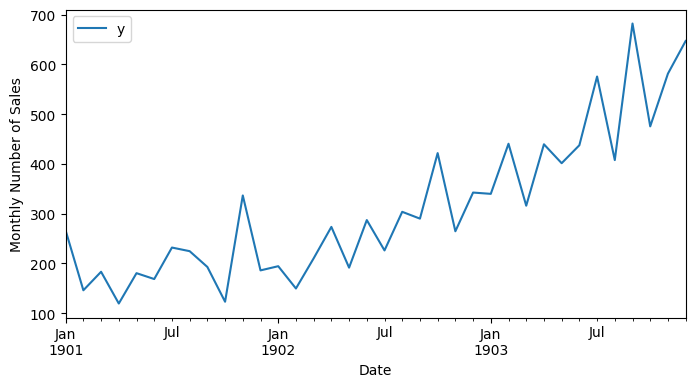

In [ ]:
ax = df.set_index('ds').plot(figsize=(8, 4))
ax.set_ylabel('Monthly Number of Sales')
ax.set_xlabel('Date')

plt.show()

In [ ]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)
my_model.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp5jfp3sz/84udo1kn.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp5jfp3sz/265q378t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46541', 'data', 'file=/tmp/tmpp5jfp3sz/84udo1kn.json', 'init=/tmp/tmpp5jfp3sz/265q378t.json', 'output', 'file=/tmp/tmpp5jfp3sz/prophet_modelfn6cxlk1/prophet_model-20240917141306.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:13:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:13:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

,ds
0,1901-01-01
1,1901-02-01
2,1901-03-01
3,1901-04-01
4,1901-05-01


In [ ]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1901-01-01,217.227835,108.205710,327.856330
1,1901-02-01,66.148530,-50.938995,178.400256
2,1901-03-01,129.841121,21.401957,242.574087
3,1901-04-01,85.481825,-31.109264,203.408556
4,1901-05-01,128.148777,19.662853,246.076681


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



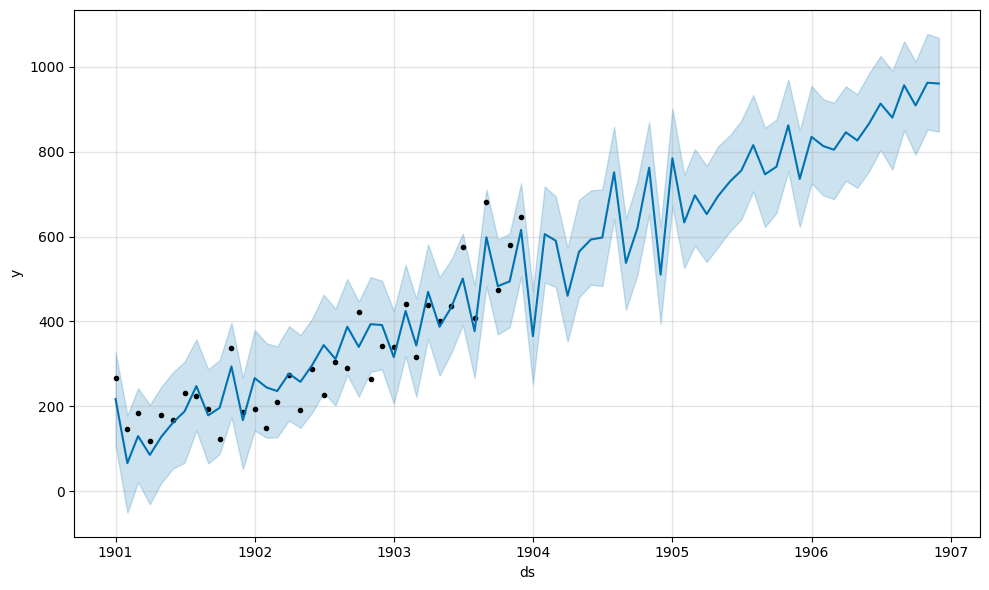

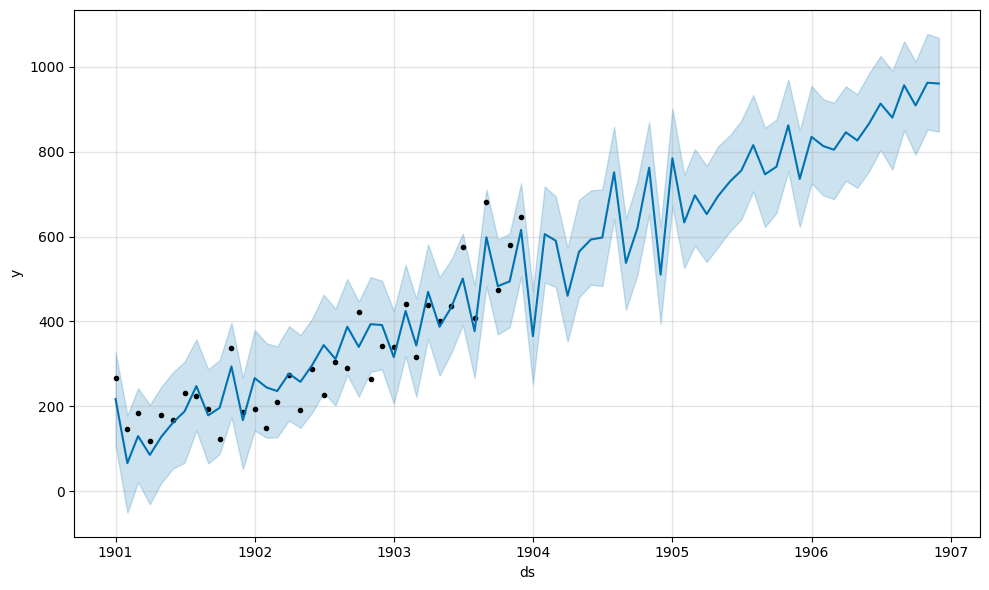

In [ ]:
my_model.plot(forecast, uncertainty=True)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



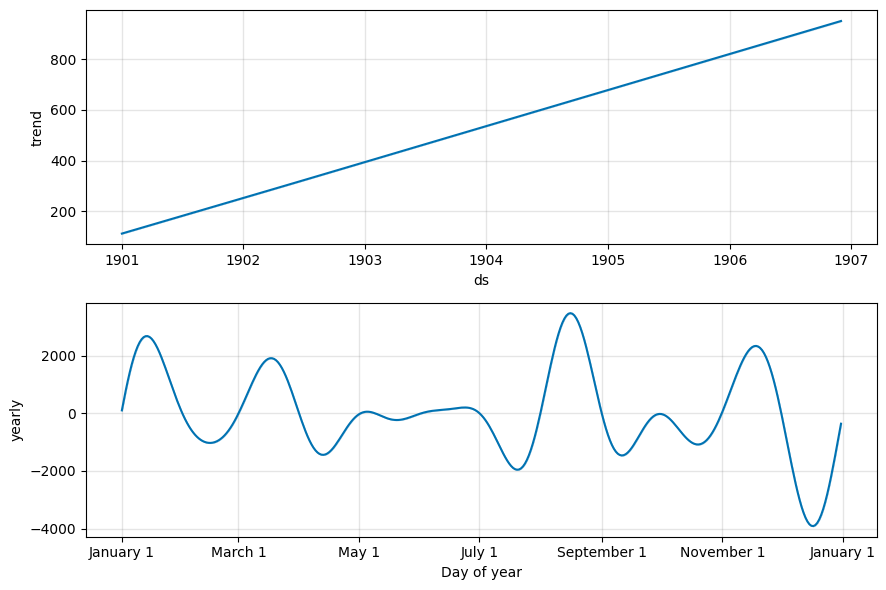

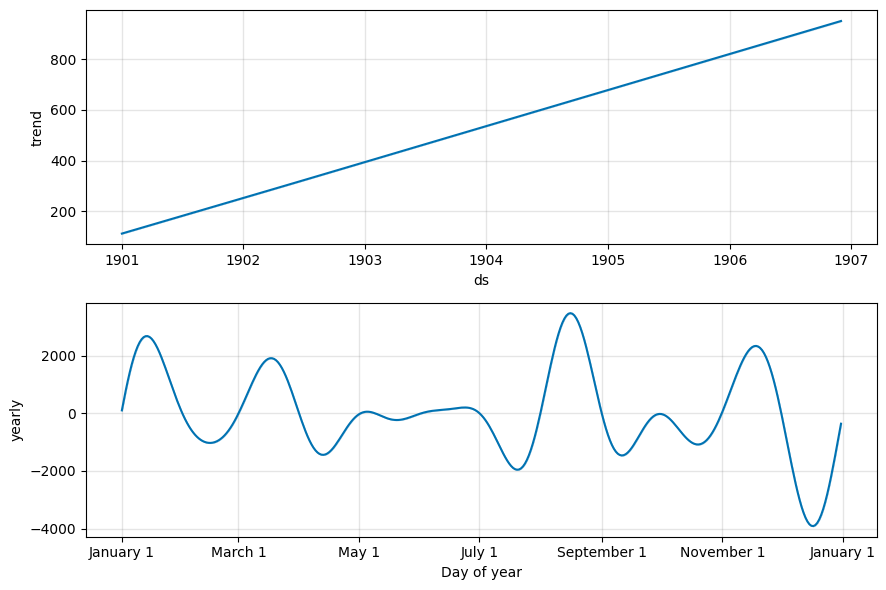

In [ ]:
my_model.plot_components(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



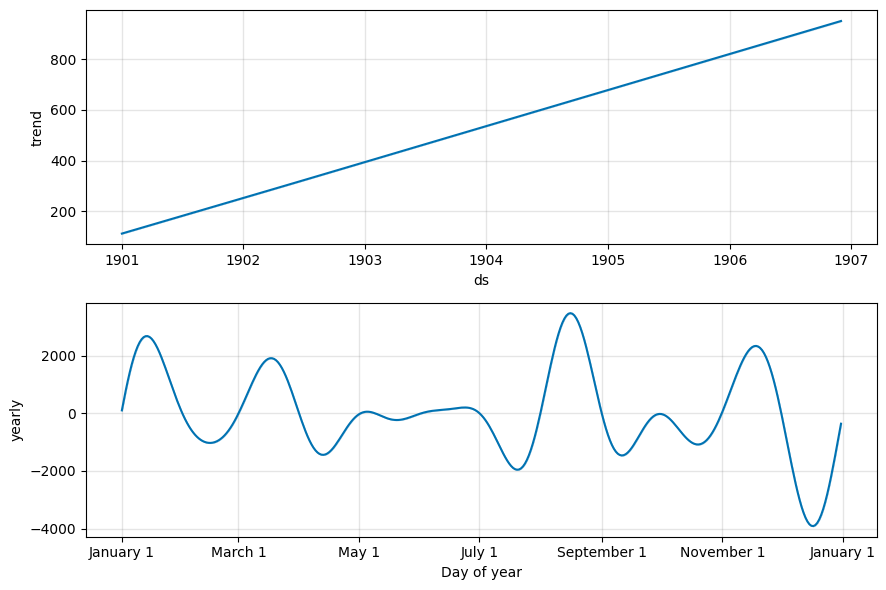

In [ ]:
fig1 = my_model.plot_components(forecast)

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



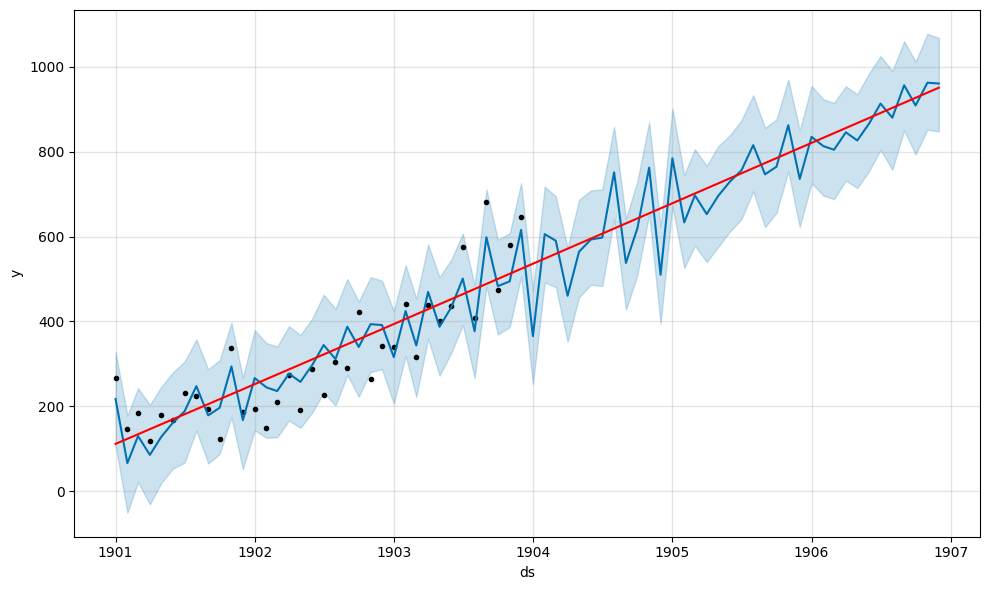

In [ ]:
from prophet.plot import add_changepoints_to_plot
fig = my_model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), my_model, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp5jfp3sz/l3ljtk7t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp5jfp3sz/nwkikrkq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9655', 'data', 'file=/tmp/tmpp5jfp3sz/l3ljtk7t.json', 'init=/tmp/tmpp5jfp3sz/nwkikrkq.json', 'output', 'file=/tmp/tmpp5jfp3sz/prophet_model0am4hm7j/prophet_model-20240917141725.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:17:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:17:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

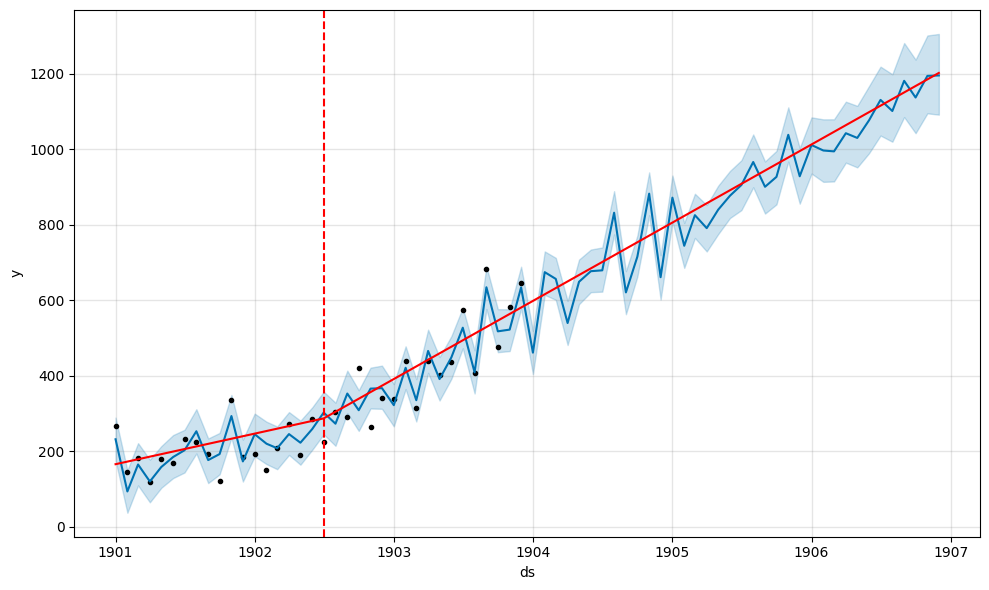

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.08)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp5jfp3sz/r6jm4r_1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp5jfp3sz/6teqwcty.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93424', 'data', 'file=/tmp/tmpp5jfp3sz/r6jm4r_1.json', 'init=/tmp/tmpp5jfp3sz/6teqwcty.json', 'output', 'file=/tmp/tmpp5jfp3sz/prophet_modelf1r3_8zs/prophet_model-20240917141806.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:18:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:18:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages

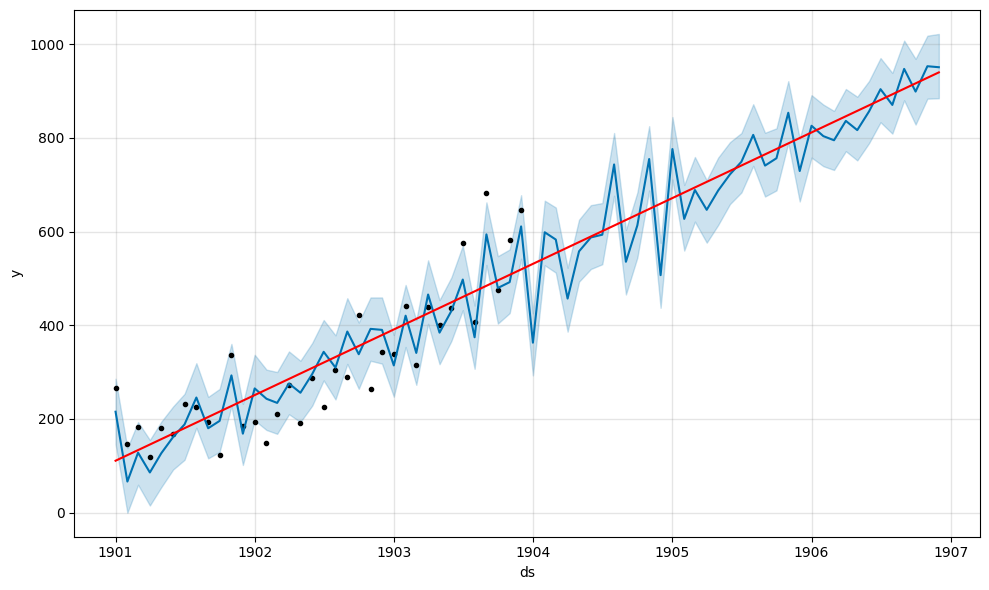

In [ ]:
pro_change= Prophet(n_changepoints=20, yearly_seasonality=True, changepoint_prior_scale=0.001)
forecast = pro_change.fit(df).predict(future_dates)
fig= pro_change.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), pro_change, forecast)